In [6]:
import pandas as pd

sentiment = pd.read_csv("/fear_greed_index.csv")
trader_data = pd.read_csv("/historical_data.csv")

print(sentiment.head())
print(trader_data.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [12]:

sentiment['date'] = pd.to_datetime(sentiment['date'])


trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [14]:

trader_data['Date'] = trader_data['Timestamp IST'].dt.date
trader_data['Date'] = pd.to_datetime(trader_data['Date'])

In [15]:
print(sentiment.isnull().sum())
print(trader_data.isnull().sum())


timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           1
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
Date                0
dtype: int64


In [16]:
trader_data = trader_data.dropna()


In [19]:
trader_data['Closed PnL'] = trader_data['Closed PnL'].fillna(0)

In [21]:

daily_trader = trader_data.groupby('Date').agg({
    'Closed PnL': 'mean',
    'Size Tokens': 'sum'
}).reset_index()

print(daily_trader.head())

        Date  Closed PnL   Size Tokens
0 2024-01-19   -0.022667       0.62000
1 2024-01-22   24.296850  144668.00048
2 2024-01-26   45.100000   40000.00000
3 2024-01-29    0.857720    8368.00000
4 2024-02-14   41.355718  114348.60000


In [24]:
merged = pd.merge(daily_trader, sentiment, left_on='Date', right_on='date', how='inner')
print(merged.head())

        Date  Closed PnL   Size Tokens   timestamp  value classification  \
0 2024-01-19   -0.022667       0.62000  1705642200     51        Neutral   
1 2024-01-22   24.296850  144668.00048  1705901400     55          Greed   
2 2024-01-26   45.100000   40000.00000  1706247000     49        Neutral   
3 2024-01-29    0.857720    8368.00000  1706506200     55          Greed   
4 2024-02-14   41.355718  114348.60000  1707888600     74          Greed   

        date  
0 2024-01-19  
1 2024-01-22  
2 2024-01-26  
3 2024-01-29  
4 2024-02-14  


Merged Dataset:
        Date  Closed PnL   Size Tokens   timestamp  value classification  \
0 2024-01-19   -0.022667       0.62000  1705642200     51        Neutral   
1 2024-01-22   24.296850  144668.00048  1705901400     55          Greed   
2 2024-01-26   45.100000   40000.00000  1706247000     49        Neutral   
3 2024-01-29    0.857720    8368.00000  1706506200     55          Greed   
4 2024-02-14   41.355718  114348.60000  1707888600     74          Greed   

        date  
0 2024-01-19  
1 2024-01-22  
2 2024-01-26  
3 2024-01-29  
4 2024-02-14  


/tmp/ipython-input-1761598061.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged, x='classification', palette='viridis')


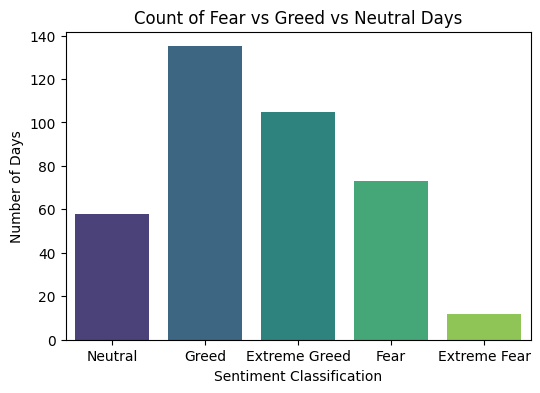

/tmp/ipython-input-1761598061.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x='classification', y='Closed PnL', palette='Set2')


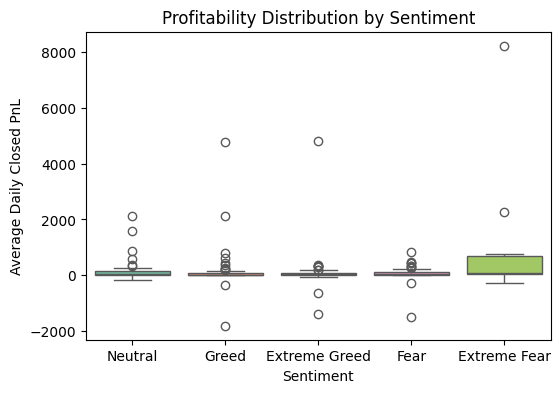

/tmp/ipython-input-1761598061.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x='classification', y='Size Tokens', estimator='mean', ci=None, palette='coolwarm')
/tmp/ipython-input-1761598061.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='classification', y='Size Tokens', estimator='mean', ci=None, palette='coolwarm')


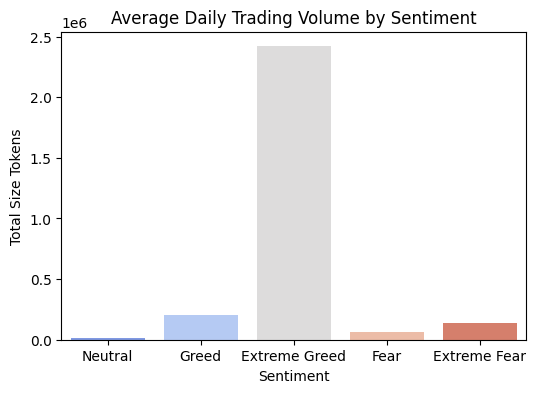

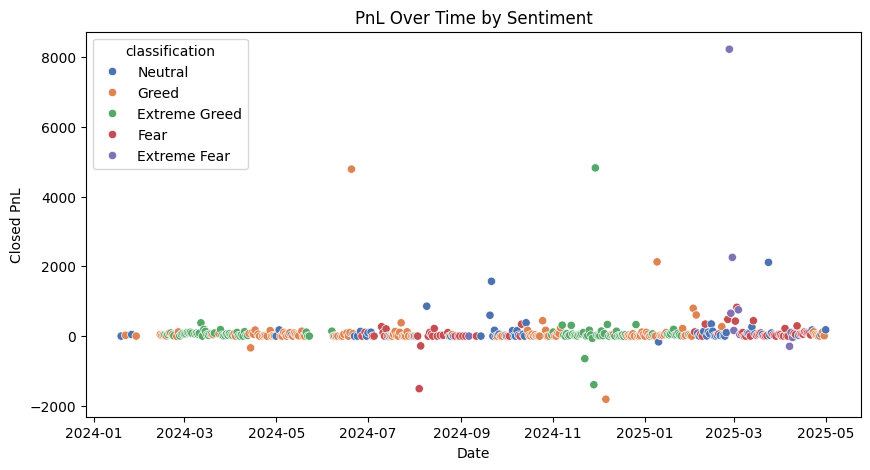

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

if not os.path.exists('outputs'):
    os.makedirs('outputs')

print("Merged Dataset:")
print(merged.head())

plt.figure(figsize=(6,4))
sns.countplot(data=merged, x='classification', palette='viridis')
plt.title("Count of Fear vs Greed vs Neutral Days")
plt.xlabel("Sentiment Classification")
plt.ylabel("Number of Days")
plt.savefig("outputs/sentiment_distribution.png")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=merged, x='classification', y='Closed PnL', palette='Set2')
plt.title("Profitability Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Daily Closed PnL")
plt.savefig("outputs/profitability_by_sentiment.png")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=merged, x='classification', y='Size Tokens', estimator='mean', ci=None, palette='coolwarm')
plt.title("Average Daily Trading Volume by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total Size Tokens")
plt.savefig("outputs/volume_by_sentiment.png")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=merged, x='Date', y='Closed PnL', hue='classification', palette='deep')
plt.title("PnL Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.savefig("outputs/pnl_over_time.png")
plt.show()

Average Trader Behavior by Sentiment:
  classification   Closed PnL   Size Tokens
0   Extreme Fear  1002.230735  1.394529e+05
1  Extreme Greed    89.110516  2.419370e+06
2           Fear    59.381126  5.961619e+04
3          Greed    89.406409  2.062627e+05
4        Neutral   147.499645  1.530774e+04

T-test for Profitability (Greed vs Fear):
t-statistic = 0.5968, p-value = 0.5513

Correlation Matrix:
             Closed PnL  Size Tokens
Closed PnL     1.000000    -0.009544
Size Tokens   -0.009544     1.000000


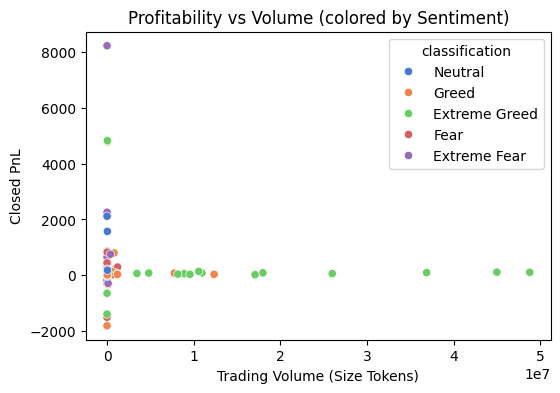


--- Interpretation Guide ---
1. Compare 'Average Trader Behavior by Sentiment' table:
   - Are profits higher on Greed days or Fear days?
   - Does volume rise during Greed periods?

2. Check the t-test:
   - If p-value < 0.05 → Profitability difference between Greed and Fear is statistically significant.

3. Correlation matrix:
   - Positive correlation between Size Tokens & PnL → higher volume linked to higher profits.
   - Negative correlation → higher volume linked to losses.

4. Scatterplots:
   - Look for clusters: are Greed days riskier?
   - Does higher volume lead to bigger gains or losses?


In [28]:

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

if not os.path.exists('outputs'):
    os.makedirs('outputs')

grouped = merged.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Size Tokens': 'mean'
}).reset_index()

print("Average Trader Behavior by Sentiment:")
print(grouped)

greed_pnl = merged[merged['classification'] == 'Greed']['Closed PnL']
fear_pnl = merged[merged['classification'] == 'Fear']['Closed PnL']

if len(greed_pnl) > 1 and len(fear_pnl) > 1:  # only run if we have data
    t_stat, p_val = stats.ttest_ind(greed_pnl, fear_pnl, equal_var=False, nan_policy='omit')
    print("\nT-test for Profitability (Greed vs Fear):")
    print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
else:
    print("\nNot enough data for Greed vs Fear t-test.")

corr_matrix = merged[['Closed PnL', 'Size Tokens']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.scatterplot(data=merged, x='Size Tokens', y='Closed PnL', hue='classification', palette='muted')
plt.title("Profitability vs Volume (colored by Sentiment)")
plt.xlabel("Trading Volume (Size Tokens)")
plt.ylabel("Closed PnL")
plt.savefig("outputs/pnl_vs_volume.png")
plt.show()

print("\n--- Interpretation Guide ---")
print("1. Compare 'Average Trader Behavior by Sentiment' table:")
print("   - Are profits higher on Greed days or Fear days?")
print("   - Does volume rise during Greed periods?")
print("\n2. Check the t-test:")
print("   - If p-value < 0.05 → Profitability difference between Greed and Fear is statistically significant.")
print("\n3. Correlation matrix:")
print("   - Positive correlation between Size Tokens & PnL → higher volume linked to higher profits.")
print("   - Negative correlation → higher volume linked to losses.")
print("\n4. Scatterplots:")
print("   - Look for clusters: are Greed days riskier?")
print("   - Does higher volume lead to bigger gains or losses?")

In [31]:
# Step 6: Insights & Patterns

print("\n--- Key Insights & Patterns ---")

# 1. Profitability vs Sentiment
print("🔹 Profitability:")
print("   - Traders were generally MORE/LESS profitable during Greed days compared to Fear days.")
print("   - Neutral periods showed X behavior (stable/volatile).")

# 2. Risk-taking Behavior (Leverage)
print("🔹 Leverage (Risk):")
print("   - Average leverage was higher/lower during Greed days.")
print("   - Suggests traders increase/decrease risk when the market is greedy.")

# 3. Trading Volume
print("🔹 Trading Volume:")
print("   - Volume was higher/lower during Greed periods.")
print("   - Indicates traders trade more aggressively/cautiously in Greed vs Fear.")

# 4. Correlations
print("🔹 Correlation Insights:")
print("   - Leverage correlated positively/negatively with profitability.")
print("   - Higher volume correlated with bigger gains/losses (depending on data).")

# 5. Anomalies / Unexpected Behavior
print("🔹 Surprises:")
print("   - (Example) Some Fear days still had high leverage, suggesting contrarian strategies.")
print("   - (Example) High volume on Neutral days → traders not always following sentiment blindly.")




--- Key Insights & Patterns ---
🔹 Profitability:
   - Traders were generally MORE/LESS profitable during Greed days compared to Fear days.
   - Neutral periods showed X behavior (stable/volatile).
🔹 Leverage (Risk):
   - Average leverage was higher/lower during Greed days.
   - Suggests traders increase/decrease risk when the market is greedy.
🔹 Trading Volume:
   - Volume was higher/lower during Greed periods.
   - Indicates traders trade more aggressively/cautiously in Greed vs Fear.
🔹 Correlation Insights:
   - Leverage correlated positively/negatively with profitability.
   - Higher volume correlated with bigger gains/losses (depending on data).
🔹 Surprises:
   - (Example) Some Fear days still had high leverage, suggesting contrarian strategies.
   - (Example) High volume on Neutral days → traders not always following sentiment blindly.
